# Using Interact

The `interact` function (`ipywidgets.interact`) automatically creates user interface (UI) controls for exploring code and data interactively. It is the easiest way to get started using IPython's widgets.

In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Basic `interact`

At the most basic level, `interact` autogenerates UI controls for function arguments, and then calls the function with those arguments when you manipulate the controls interactively. To use `interact`, you need to define a function that you want to explore. Here is a function that returns its only argument `x`.

In [2]:
def f(x):
    return x

When you pass this function as the first argument to `interact` along with an integer keyword argument (`x=10`), a slider is generated and bound to the function parameter.

In [3]:
interact(f, x=10);

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

When you move the slider, the function is called, and its return value is printed.

If you pass `True` or `False`, `interact` will generate a checkbox:

In [ ]:
interact(f, x=True);

If you pass a string, `interact` will generate a text box.

In [ ]:
interact(f, x='Hi there!');

`interact` can also be used as a decorator. This allows you to define a function and interact with it in a single shot. As this example shows, `interact` also works with functions that have multiple arguments.

In [ ]:
@interact(x=True, y=1.0)
def g(x, y):
    return (x, y)

## Fixing arguments using `fixed`

There are times when you may want to explore a function using `interact`, but fix one or more of its arguments to specific values. This can be accomplished by wrapping values with the `fixed` function.

In [ ]:
def h(p, q):
    return (p, q)

When we call `interact`, we pass `fixed(20)` for q to hold it fixed at a value of `20`.

In [ ]:
interact(h, p=5, q=fixed(20));

Notice that a slider is only produced for `p` as the value of `q` is fixed.

## Widget abbreviations

When you pass an integer-valued keyword argument of `10` (`x=10`) to `interact`, it generates an integer-valued slider control with a range of `[-10,+3*10]`. In this case, `10` is an *abbreviation* for an actual slider widget:

```python
IntSlider(min=-10, max=30, step=1, value=10)
```

In fact, we can get the same result if we pass this `IntSlider` as the keyword argument for `x`:

In [ ]:
interact(f, x=widgets.IntSlider(min=-10, max=30, step=1, value=10));

The following table gives an overview of different argument types, and how they map to interactive controls:

<table class="table table-condensed table-bordered">
  <tr><td><strong>Keyword argument</strong></td><td><strong>Widget</strong></td></tr>  
  <tr><td>`True` or `False`</td><td>Checkbox</td></tr>  
  <tr><td>`'Hi there'`</td><td>Text</td></tr>
  <tr><td>`value` or `(min,max)` or `(min,max,step)` if integers are passed</td><td>IntSlider</td></tr>
  <tr><td>`value` or `(min,max)` or `(min,max,step)` if floats are passed</td><td>FloatSlider</td></tr>
  <tr><td>`['orange','apple']` or `[('one', 1), ('two', 2)]</td><td>Dropdown</td></tr>
</table>
Note that a dropdown is used if a list or a list of tuples is given (signifying discrete choices), and a slider is used if a tuple is given (signifying a range).

You have seen how the checkbox and text widgets work above. Here, more details about the different abbreviations for sliders and dropdowns are given.

If a 2-tuple of integers is passed `(min, max)`, an integer-valued slider is produced with those minimum and maximum values (inclusively). In this case, the default step size of `1` is used.

In [ ]:
interact(f, x=(0,4));

If a 3-tuple of integers is passed `(min,max,step)`, the step size can also be set.

In [ ]:
interact(f, x=(0,8,2));

A float-valued slider is produced if *any* of the elements of the tuples are floats. Here the minimum is `0.0`, the maximum is `10.0` and step size is `0.1` (the default).

In [ ]:
interact(f, x=(0.0,10.0));

The step size can be changed by passing a third element in the tuple.

In [ ]:
interact(f, x=(0.0,10.0,0.01));

For both integer and float-valued sliders, you can pick the initial value of the widget by passing a default keyword argument to the underlying Python function. Here we set the initial value of a float slider to `5.5`.

In [ ]:
@interact(x=(0.0,20.0,0.5))
def h(x=5.5):
    return x

Dropdown menus are constructed by passing a list of strings. In this case, the strings are both used as the names in the dropdown menu UI and passed to the underlying Python function.

In [ ]:
interact(f, x=['apples','oranges']);

If you want a dropdown menu that passes non-string values to the Python function, you can pass a list of `('label', value)` pairs. The first items are the names in the dropdown menu UI and the second items are values that are the arguments passed to the underlying Python function.

In [ ]:
interact(f, x=[('one', 10), ('two', 20)]);

Finally, if you need more granular control than that afforded by the abbreviation, you can pass a `ValueWidget` instance as the argument. A `ValueWidget` is a widget that aims to control a single value. Most of the widgets [bundled with ipywidgets](Widget%20List) inherit from `ValueWidget`. For more information, see [this section](Widget%20Custom.ipynb#DOMWidget,-ValueWidget-and-Widget) on widget types.

In [ ]:
interact(f, x=widgets.Combobox(options=["Chicago", "New York", "Washington"], value="Chicago"));

## `interactive`

In addition to `interact`, IPython provides another function, `interactive`, that is useful when you want to reuse the widgets that are produced or access the data that is bound to the UI controls.

Note that unlike `interact`, the return value of the function will not be displayed automatically, but you can display a value inside the function with `IPython.display.display`.

Here is a function that displays the sum of its two arguments and returns the sum. The `display` line may be omitted if you don't want to show the result of the function.

In [ ]:
from IPython.display import display
def f(a, b):
    display(a + b)
    return a+b

Unlike `interact`, `interactive` returns a `Widget` instance rather than immediately displaying the widget.

In [ ]:
w = interactive(f, a=10, b=20)

The widget is an `interactive`, a subclass of `VBox`, which is a container for other widgets.

In [ ]:
type(w)

The children of the `interactive` are two integer-valued sliders and an output widget, produced by the widget abbreviations above.

In [ ]:
w.children

To actually display the widgets, you can use IPython's `display` function.

In [ ]:
display(w)

At this point, the UI controls work just like they would if `interact` had been used. You can manipulate them interactively and the function will be called. However, the widget instance returned by `interactive` also gives you access to the current keyword arguments and return value of the underlying Python function. 

Here are the current keyword arguments. If you rerun this cell after manipulating the sliders, the values will have changed.

In [ ]:
w.kwargs

Here is the current return value of the function.

In [ ]:
w.result

## Disabling continuous updates

When interacting with long running functions, realtime feedback is a burden instead of being helpful.  See the following example:

In [ ]:
def slow_function(i):
    print(int(i),list(x for x in range(int(i)) if 
                str(x)==str(x)[::-1] and 
                str(x**2)==str(x**2)[::-1]))
    return

In [ ]:
%%time
slow_function(1e6)

Notice that the output is updated even while dragging the mouse on the slider. This is not useful for long running functions due to lagging:

In [ ]:
from ipywidgets import FloatSlider
interact(slow_function,i=FloatSlider(min=1e5, max=1e7, step=1e5));

There are two ways to mitigate this.  You can either only execute on demand, or restrict execution to mouse release events.

### `interact_manual`

The `interact_manual` function provides a variant of interaction that allows you to restrict execution so it is only done on demand.  A button is added to the interact controls that allows you to trigger an execute event.

In [ ]:
interact_manual(slow_function,i=FloatSlider(min=1e5, max=1e7, step=1e5));

You can do the same thing with `interactive` by using a `dict` as the second argument, as shown below.

In [ ]:
slow = interactive(slow_function, {'manual': True}, i=widgets.FloatSlider(min=1e4, max=1e6, step=1e4))
slow

### `continuous_update`

If you are using slider widgets, you can set the `continuous_update` kwarg to `False`.  `continuous_update` is a kwarg of slider widgets that restricts executions to mouse release events.

In [ ]:
interact(slow_function,i=FloatSlider(min=1e5, max=1e7, step=1e5, continuous_update=False));

## More control over the user interface: `interactive_output`

`interactive_output` provides additional flexibility: you can control how the UI elements are laid out.

Unlike `interact`, `interactive`, and `interact_manual`, `interactive_output` does not generate a user interface for the widgets. This is powerful, because it means you can create a widget, put it in a box, and then pass the widget to `interactive_output`, and have control over the widget and its layout.

In [ ]:
a = widgets.IntSlider()
b = widgets.IntSlider()
c = widgets.IntSlider()
ui = widgets.HBox([a, b, c])
def f(a, b, c):
    print((a, b, c))

out = widgets.interactive_output(f, {'a': a, 'b': b, 'c': c})

display(ui, out)

## Arguments that are dependent on each other

Arguments that are dependent on each other can be expressed manually using `observe`.  See the following example, where one variable is used to describe the bounds of another.  For more information, please see the [widget events example notebook](./Widget%20Events.ipynb).

In [ ]:
x_widget = FloatSlider(min=0.0, max=10.0, step=0.05)
y_widget = FloatSlider(min=0.5, max=10.0, step=0.05, value=5.0)

def update_x_range(*args):
    x_widget.max = 2.0 * y_widget.value
y_widget.observe(update_x_range, 'value')

def printer(x, y):
    print(x, y)
interact(printer,x=x_widget, y=y_widget);

## Flickering and jumping output

On occasion, you may notice interact output flickering and jumping, causing the notebook scroll position to change as the output is updated. The interactive control has a layout, so we can set its height to an appropriate value (currently chosen manually) so that it will not change size as it is updated.


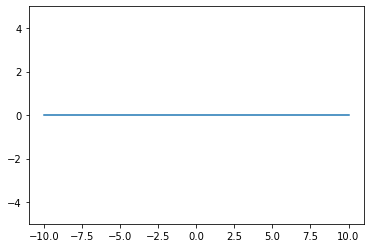

In [4]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot